# 2D Crack propagation in a bended beam

 - @todo: Plot the residual value
 - @todo: State dependencies - recalculate upon material parameter change

In [2]:
%matplotlib widget
from bmcs_shear.shear_crack.beam_design import RCBeamDesign
from bmcs_shear.api import CrackBridgeAdv
from bmcs_shear.shear_crack.crack_propagation import CrackPropagation
from bmcs_shear.shear_crack.crack_extension import CrackExtension
import numpy as np
np.seterr(divide='ignore', invalid='ignore') ;

ModuleNotFoundError: No module named 'bmcs_shear.shear_crack.beam_design'

In [ ]:
ce = CrackExtension()
ce.sz_cp.trait_set(x_00=4, n_m=12)
ce.sz_bd.trait_set(H=400 ,L=1000, B=50);
ce.sz_bd.csl.add_layer(CrackBridgeAdv(z=20, n=1, d_s=0.1))

In [ ]:
ce.X

In [9]:
ce.sz_cp.add_x_tip_an([400,2])

In [29]:
ce = CrackPropagation(n_seg=1)
# ce.sz_bd.matrix='advanced'
# ce.sz_bd.matrix_.trait_set(tau_1 = 4, s_1 = 0.2, tau_2 = 3, tau_3 = 2, s_2 = 1.4, s_3 = 5)
# ce.sz_bd.matrix_.trait_set(L_fps=50)
ce.sz_bd.trait_set(H=300, L=1000, B=100)
ce.sz_cp.trait_set(x_00=100, n_m = 15)
ce.sz_bd.csl.add_layer(CrackBridgeAdv(z=20, n=1, d_s=1))
#ce.sz_cp.add_x_tip_an([400,1])

In [30]:
ce.X

no convergence


StopIteration: no solution found

In [4]:
ce.reset()
ce.run()

no convergence
stopped after 1


In [39]:
ce.X

array([7.15756657e-04, 1.50081677e+02])

In [40]:
ce.interact()

In [35]:
%matplotlib widget
import bmcs_utils.api as bu
from bmcs_shear.shear_crack.crack_tip_orientation import CrackStateAnimator
ce = CrackStateAnimator()
ce.sz_bd.matrix='simple'
ce.sz_bd.matrix_.trait_set(tau_1 = 4, s_1 = 0.2, tau_2 = 3, tau_3 = 2, s_2 = 1.4, s_3 = 5)
x_00=ce.sz_bd.L * 0.3
ce.sz_cp.trait_set(x_00=x_00, n_m = 15)
ce.sz_bd.trait_set(H=300, B=200, L=1000)
ce.sz_cp.add_x_tip_an([x_00-10, 50]) 
ce.sz_cp.add_x_tip_an([x_00-30, 100]) 

#ce.sz_bd.cross_section_layout.reinforcement[0].trait_set(z=20, A=1, E=1)

TypeError: get_sig_w() takes 1 positional argument but 2 were given

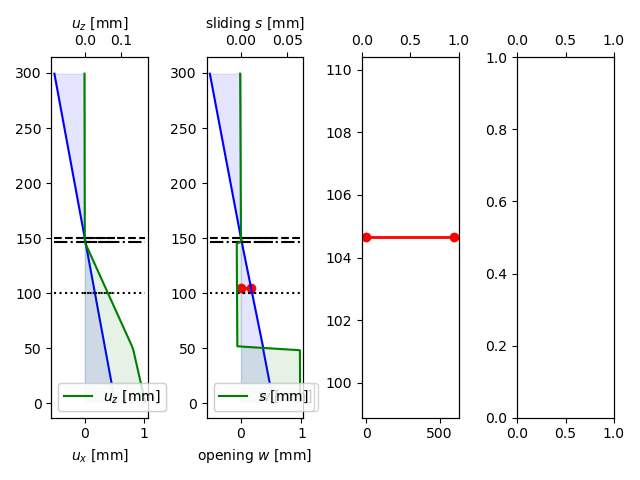

In [6]:
ce.interact()

In [5]:
import numpy as np
S_Lb = ce.sz_stress_profile.S_Lb
S_La = ce.sz_stress_profile.S_La
idx = np.argmax(S_Lb[...,0])

In [6]:
S_Lb[idx,:], S_La[idx,:]

(array([5.95238095e+02, 2.15069016e-01]),
 array([5.95238095e+02, 2.15069016e-01]))

In [ ]:
ce.sz_cp.T_Mab[idx,...]

In [ ]:
np.einsum('i,i', S_Lb[idx,:], S_Lb[idx,:])

In [ ]:
np.einsum('i,i', S_La[idx,:], S_La[idx,:])

Todo:

 - include the reinforcement material law - partially done 
   (but for strain-based material law) - replace with the crack bridge law
 - transformation of the crack bridging force to the global coordinates
 - include the dowel effect 

In [ ]:
#ce.sz_cp._get_norm_n_vec_L()

In [ ]:
#ce.sz_cp._get_x_Ka()

In [ ]:
#ce.sz_stress_profile._get_S_La()

In [ ]:
#ce.sz_stress_profile._get_F_La()

In [ ]:
#ce.sz_stress_profile._get_F_ag()

In [ ]:
#ce.sz_stress_profile._get_u_Lb()

In [ ]:
#ce.sz_stress_profile._get_S_Lb()[:,1]

In [ ]:
ce.sz_stress_profile.u_La[...,1]

In [ ]:
ce.sz_cp.x_Ka

In [ ]:
ce.sz_stress_profile.u_La[...,1]

In [ ]:
ce.sz_stress_profile.normalized_def #[...,1]

In [ ]:
ce.sz_stress_profile.tau_exp

In [ ]:
ce.sz_stress_profile.F_Na[...,0]

In [ ]:
ce.sz_ctr._get_x_rot_ak()